## 머Chill러닝: Team Study 3주차

### 머신러닝 주요 개념

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from bayes_opt import BayesianOptimization

In [ ]:
from google.colab import files
from IPython.display import Image

### 데이터 인코딩

#### 머신러닝 모델은 범주형 데이터를 인식하지 못해 숫자 데이터로 바꿔야 하므로 데이터 인코딩으로 변환해준다.

##### 레이블 인코딩: 범주형 데이터를 숫자로 일대일 매핑해주는 인코딩 방식(sklearn의 LabelEncoder 사용)

In [ ]:
fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']

# 레이블 인코더 생성
label_encoder = LabelEncoder()
# 적용
fruits_label_encoded = label_encoder.fit_transform(fruits)

print('레이블 인코딩 적용 후 데이터', fruits_label_encoded)

레이블 인코딩 적용 후 데이터 [3 2 1 0 2 1 1 3]


##### 원-핫 인코딩: 여러 값 중 하나만 활성화(hot)

In [ ]:
fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']

# 레이블 인코더, 원-핫 인코더 생성
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

# 레이블 인코딩 적용(문자데이터 -> 숫자데이터)
fruits_label_encoded = label_encoder.fit_transform(fruits)
# 원-핫 인코딩 적용
fruits_onehot_encoded = onehot_encoder.fit_transform(fruits_label_encoded.reshape(-1,1)) #reshape(-1,1) : 2차원으로 차원변경

print('원-핫 인코딩 적용 후 데이터:\n', fruits_onehot_encoded.toarray()) # .torray(): 압축 형태인 CSR형태에서 일반배열로 바꿔줌

원-핫 인코딩 적용 후 데이터:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


### 피처 스케일링
#### 서로 다른 피처 값의 범위(최댓값-최솟값)가 일치하도록 조정하는 작업

##### min-max 정규화
$$
x_{\text{scaled}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$


In [ ]:
## 동작 과정 확인

# 데이터 셋 생성
height_weight_dict= {'키': [1.7, 1.5, 1.8], '몸무게': [75,55,60]}
df = pd.DataFrame(height_weight_dict, index=['광일', '혜성', '덕수'])

df

,키,몸무게
광일,1.7,75
혜성,1.5,55
덕수,1.8,60


In [ ]:
# min-max 정규화 객체 생성 및 적용
scaler = MinMaxScaler()

scaler.fit(df)
df_scaled = scaler.transform(df)

df_scaled

array([[0.66666667, 1.        ],
       [0.        , 0.        ],
       [1.        , 0.25      ]])

##### 표준화: StandardScaler

In [ ]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

df_scaled

array([[ 0.26726124,  1.37281295],
       [-1.33630621, -0.98058068],
       [ 1.06904497, -0.39223227]])

### 교차 검증

#### train data를 여러 그룹으로 나누어 일부는 훈련시 사용하고 일부는 검증시 사용해서 모델 성능을 측정하는 기법

#### train만 하고 test를 하지 않으면 모델이 과적합될 수 있으며, 모델 성능을 제출 전에 확인하기 힘들기 때문에 교차 검증한다.

#### K 폴드 교차 검증

##### 전체 데이터를 train, test 데이터로 지정하고 다른 그룹으로 바꿔가며 이 절차를 K번 반복한 후 검증 평가점수의 평균을 구하는 방법

In [ ]:
data = np.array([0,1,2,3,4,5,6,7,8,9])

folds = KFold(n_splits=5, shuffle=False)

for train_idx, valid_idx in folds.split(data):
    print('훈련 데이터:', data[train_idx], '검증 데이터:', data[valid_idx])

훈련 데이터: [2 3 4 5 6 7 8 9] 검증 데이터: [0 1]
훈련 데이터: [0 1 4 5 6 7 8 9] 검증 데이터: [2 3]
훈련 데이터: [0 1 2 3 6 7 8 9] 검증 데이터: [4 5]
훈련 데이터: [0 1 2 3 4 5 8 9] 검증 데이터: [6 7]
훈련 데이터: [0 1 2 3 4 5 6 7] 검증 데이터: [8 9]


In [ ]:
# 위처럼 셔플을 안하면 데이터가 편중될수 있으므로 셔플을 해주면 좋음
folds = KFold(n_splits=5, shuffle=True)

for train_idx, valid_idx in folds.split(data):
    print('훈련 데이터:', data[train_idx], '검증 데이터:', data[valid_idx])

훈련 데이터: [0 1 2 3 4 5 7 8] 검증 데이터: [6 9]
훈련 데이터: [0 1 3 4 5 6 8 9] 검증 데이터: [2 7]
훈련 데이터: [0 2 3 5 6 7 8 9] 검증 데이터: [1 4]
훈련 데이터: [1 2 4 5 6 7 8 9] 검증 데이터: [0 3]
훈련 데이터: [0 1 2 3 4 6 7 9] 검증 데이터: [5 8]


#### 층화 K 폴드 교차 검증

##### 타깃값이 불균형하게 분포되어 있다면, 특히 적은 특정 타깃 값을 모든 폴드에 균일하게 나누어 주어 교차검증을 수행하는 방법

In [ ]:
#예시 1: K 폴드 교차 검증일때
### 데이터 생성: 스팸 5개 + 일반 45개
y= np.array(['스팸']*5 + ['일반']*45)

folds = KFold(n_splits=5, shuffle=True) # K 폴드 교차 검증

for idx, (train_idx, valid_idx) in enumerate(folds.split(y)): # y를 기반으로 train, valid data의 index생성. 즉 train_inx랑 valid_idx 반환하는 반복문
# enumerate: idx(fold 번호) 가져오는 명령어
    print(f'Fold {idx+1} 검증 데이터 타깃값:')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃값:
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃값:
['스팸' '스팸' '스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃값:
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



In [ ]:
#예시 2: 층화 K 폴드 교차 검증일때. 1과 달리 모든 fold에 스팸 배치됨
X = np.array(range(50)) # 층화일땐 범위 지정해야함
y= np.array(['스팸']*5 + ['일반']*45)

folds = StratifiedKFold(n_splits=5) # 층화 K 폴드 교차 검증

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print(f'Fold {idx+1} 검증 데이터 타깃값:')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



### 주요 머신러닝 모델

#### 선형 회귀 모델

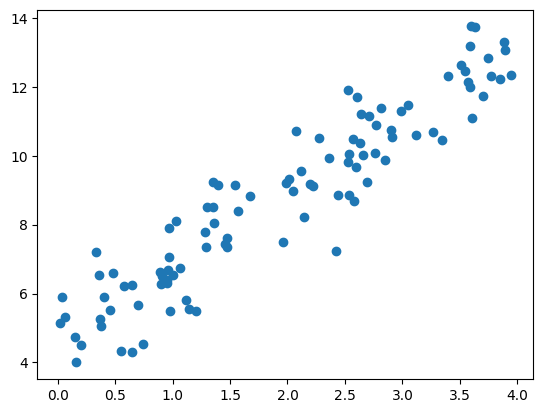

In [ ]:
# 데이터 생성(선형 회귀식 y=2x+5에 근사하는 데이터 100개)
np.random.seed(42)

w0 = 5 # y절편
w1 = 2 # 회귀계수
noise = np.random.randn(100,1) #노이즈(표준 정규분포 따르는 데이터 100개)

x= 4 * np.random.rand(100,1) # 0부터 4사이 실수값 100개 생성
y= w1*x +w0 + noise

plt. scatter(x,y);

In [ ]:
# 모델 훈련
linear_reg_model = LinearRegression()
linear_reg_model.fit(x,y)

print(linear_reg_model.intercept_, linear_reg_model.coef_) #w0: y절편, w1: 회귀계수

[4.6971402] [[2.10232967]]


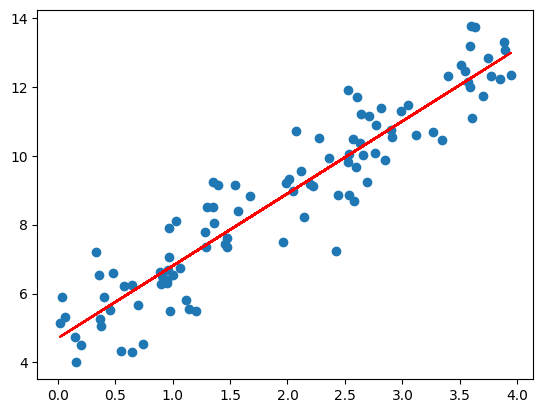

In [ ]:
# 회귀선 확인
y_pred = linear_reg_model.predict(x)

plt.scatter(x,y)
plt.plot(x, y_pred, color='red')
plt.show()

##### 결정 트리

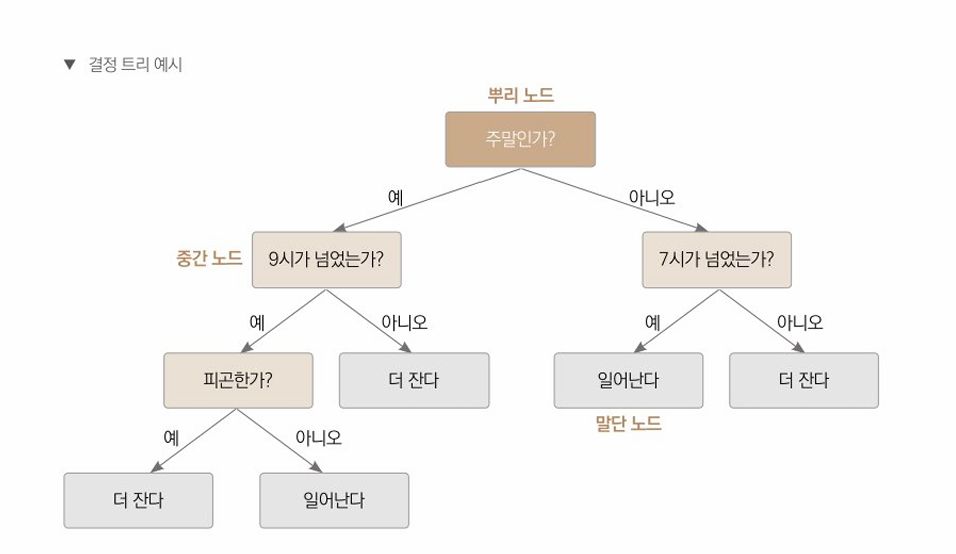

In [ ]:
from IPython.display import Image
Image("Dtree_screenshot.png")

In [ ]:
# 결정 트리 모델의 정확도 측정(유방암 데이터셋)

cancer_data = load_breast_cancer()

# data split
X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], cancer_data['target'], stratify= cancer_data['target'],test_size=0.4, random_state=42)

decisiontree = DecisionTreeClassifier(random_state=42)
decisiontree.fit(X_train, y_train)

accuracy = decisiontree.score(X_test, y_test)
print(f'모델의 정확도: {accuracy:.3f}')

모델의 정확도: 0.930


##### 앙상블 학습

###### 보팅: 개별 결과를 종합해 최종 결과를 결정하는 방식

###### 하드보팅: 다수결 투표 방식
######소프트보팅: 개별 예측 확률들의 평균을 최종 예측 확률로 정하는 방식 -> 자주 사용

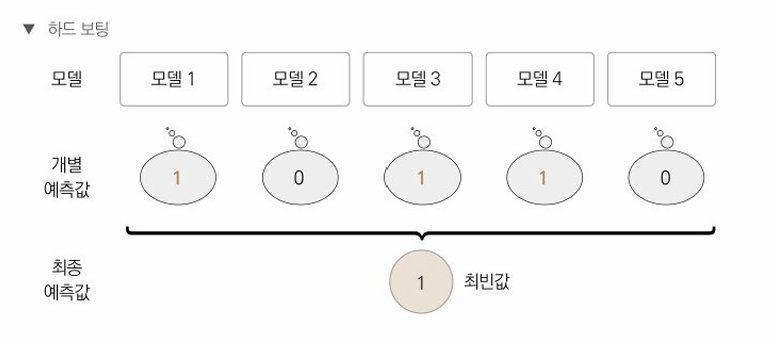

In [ ]:
Image("hardvoting_screenshot.png")

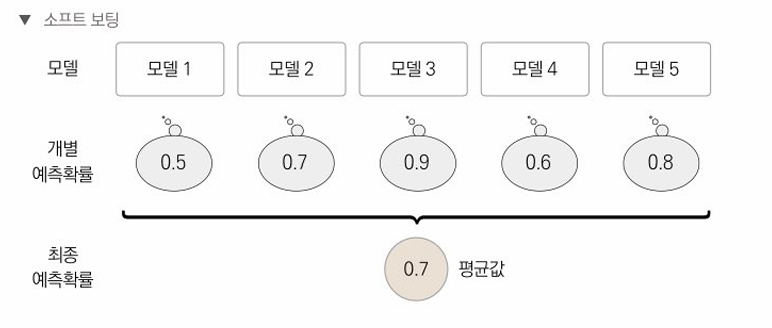

In [ ]:
Image("softvoting_screenshot.png")

##### 랜덤 포레스트: 결정트리를 배깅(개별 모델로 예측한 결과를 결합해 최종 예측을 정하는 기법) 방식으로 결합한 모형

###### 분류모델: RFClassifier
###### 회귀모델: RFRegressor

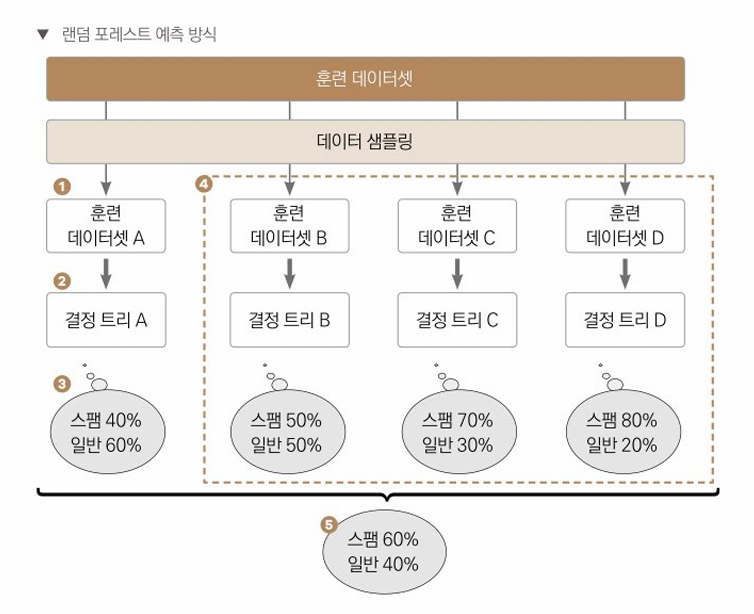

In [ ]:
Image("RF.screenshot.png")


In [ ]:
cancer_data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], cancer_data['target'], stratify= cancer_data['target'],test_size=0.4, random_state=42)
randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X_train, y_train)

accuracy = randomforest.score(X_test, y_test)
print(f'모델의 정확도: {accuracy:.3f}')

모델의 정확도: 0.939


### 하이퍼파라미터 최적화

#### 베이지안 최적화


In [ ]:
# 하이퍼파라미터 탐색 범위(딕셔너리 형태)
param_bounds = {'x':(-1,5),
                'y': (0,4)}

In [ ]:
# 평가지표 계산 함수 정의(임의)
def eval_function(x,y):
  return -x ** 2 -(y-2) **2 +10


In [ ]:
# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=eval_function, pbounds=param_bounds, random_state=0)

In [ ]:
# 베이지안 최적화 수행
optimizer.maximize(init_points=2, n_iter=10)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 1         | 4.002     | 2.293     | 2.861     |
| 2         | 3.121     | 2.617     | 2.18      |
| 3         | 3.832     | 2.327     | 2.869     |
| 4         | 4.604     | 2.164     | 2.845     |
| 5         | -6.227    | 3.989     | 2.559     |
| 6         | 9.525     | 0.3424    | 1.401     |
| 7         | 7.083     | -0.9957   | 3.388     |
| 8         | 5.258     | -0.9848   | 0.05778   |
| 9         | 3.969     | 1.461     | 0.02633   |
| 10        | 8.989     | -0.9926   | 1.841     |
| 11        | 9.734     | 0.1835    | 2.482     |
| 12        | 5.856     | 0.482     | 3.978     |


##### 총 스텝횟수(12) = init_points + n_iter

##### 전체에서 최댓값 = 색칠된 부분중 가장 마지막 스텝의 평가 점수

In [ ]:
# 평가점수가 최대일 때, 타깃 x,y값 출력
optimizer.max

{'target': np.float64(9.733647285396204),
 'params': {'x': np.float64(0.18351395362523282),
  'y': np.float64(2.482364326446962)}}